### ВВЕДЕНИЕ
Стоит задача проанализировать поведение пользователей компьютерных игр, усешные платформы, популярные жанры, особенности для каждого региона, выявить определяющие успешность игры закономерности и проверку гипотез. Также необходимо дать рекомендации для создания новой игры. Для анализа предоставлены данные за 2016 год по проданным играм, где есть детальная информация по каждому продукту. 

1. [Открытие данных](#start)
2. [Предобработка данных](#pre)
3. [Анализ выпущенных игр по годам](#years)
3. [Анализ данных по платформам](#platform)
     * [Распределение крупнейших платформ по годам.](#platform1)
     * [Выбор актуального периода для анализа и потенциально прибыльных платформ.](#platform2)
     * [Анализ потенциально прибыльных платформ.](#platform3)
     * [Анализ на примере одной платформы влияния отзывов на продажи.](#platform4)
4. [Анализ зависимости продаж и жанра игр](#genre)     
5. [Портрет пользователя каждого региона](#region)
6. [Анализ влияния рейтинга на продажи](#rating)
7. [Проверка гипотез](#hyp)
     * [Гипотеза по сравнению платформ](#hyp1)
     * [Гипотеза по сравнению жанров](#hyp2)
8. [Общий вывод](#end)

<a id="start"></a>

In [225]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats as st
import warnings
warnings.filterwarnings('ignore')

In [226]:
try:
    df = pd.read_csv ('games.csv', sep=',')
except:   
    df = pd.read_csv ('/datasets/games.csv', sep=',')

df.head(5)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [227]:
df.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


In [228]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


### ВЫВОД ПО ПРЕДОСТАВЛЕННЫМ ДАННЫМ

В предоставленных данных содержится 16715 строк, есть пропуски в данных, тип данных object и float64, данные приведены с 1980 года 

<a id="pre"></a>

## Предобработка данных

In [229]:
#приведём названия столбцов к нижнему регистру
df.columns = [x.lower() for x in df.columns]

In [230]:
df.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

Будем обрабатывать каждый столбец поочерёдно, сразу при необходимости изменяя тип и заполняя пропуски

In [231]:

df.isna().mean()

name               0.000120
platform           0.000000
year_of_release    0.016093
genre              0.000120
na_sales           0.000000
eu_sales           0.000000
jp_sales           0.000000
other_sales        0.000000
critic_score       0.513192
user_score         0.400897
rating             0.404786
dtype: float64

In [232]:
#столбец Name - тип менять не нужно, а 2 пропуска заполним просто Game, чтобы по этим играм не потерять статистику
df['name'] = df['name'].fillna('Game')

In [233]:
#столбец platform  - тип менять не нужно, все данные есть
#столбец Year_of_Release - пропуски заполним медианой -  2007 годом(пропусков не так много, поэтому сильно статиску это не исказит),тип данных заменим на datetime
df['year_of_release'] = df['year_of_release'].fillna(2007.0)
df['year_of_release'] = pd.to_datetime(df['year_of_release'], format='%Y')
df['year_of_release'] = pd.DatetimeIndex(df['year_of_release']).year

In [234]:
df.genre.value_counts()

Action          3369
Sports          2348
Misc            1750
Role-Playing    1498
Shooter         1323
Adventure       1303
Racing          1249
Platform         888
Simulation       873
Fighting         849
Strategy         683
Puzzle           580
Name: genre, dtype: int64

In [235]:
#жанр игр не указан только для двух строк. Возможно, как раз для тех строк, где и не было наименования игр
df[df['name'] == 'Game']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,Game,GEN,1993,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,Game,GEN,1993,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [236]:
#так и есть. большинство данных нет, и далекий 1993 год. Думаю, можно удалить эти строки
df = df.dropna(subset=['genre'])

In [237]:
#перейдём к стошлбцу 'user_score'
df['user_score'].value_counts().head(10)

tbd    2424
7.8     324
8       290
8.2     282
8.3     254
8.5     253
7.5     251
7.9     249
8.1     244
7.7     240
Name: user_score, dtype: int64

In [238]:

df[df['user_score'] == 'tbd'].head(20)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
119,Zumba Fitness,Wii,2010,Sports,3.45,2.59,0.00,0.66,NaN,tbd,E
301,Namco Museum: 50th Anniversary,PS2,2005,Misc,2.08,1.35,0.00,0.54,61.0,tbd,E10+
520,Zumba Fitness 2,Wii,2011,Sports,1.51,1.03,0.00,0.27,NaN,tbd,T
645,uDraw Studio,Wii,2010,Misc,1.65,0.57,0.00,0.20,71.0,tbd,E
657,Frogger's Adventures: Temple of the Frog,GBA,2007,Adventure,2.15,0.18,0.00,0.07,73.0,tbd,E
718,Just Dance Kids,Wii,2010,Misc,1.52,0.54,0.00,0.18,NaN,tbd,E
726,Dance Dance Revolution X2,PS2,2009,Simulation,1.09,0.85,0.00,0.28,NaN,tbd,E10+
821,The Incredibles,GBA,2004,Action,1.15,0.77,0.04,0.10,55.0,tbd,E
881,Who wants to be a millionaire,PC,1999,Misc,1.94,0.00,0.00,0.00,NaN,tbd,E
1047,Tetris Worlds,GBA,2001,Puzzle,1.25,0.39,0.00,0.06,65.0,tbd,E


'tbd' в переводе с английского звучит как "подлежит обсуждению". То есть возможно в нашем случае это относится к тем играм, где не собран/некорректно собран по какой-то причине рейтинг.
Поизучаем данные с этой аббревиатурой
Посмортим, возможно, играм с таким рейтингом присущи какие-то общие параметры. Будем выводить данные для среза tbd' и общие для сравнения. 
Возможно, такой рейтинг у игр с низкими продажами? Посмотрим продажи в Японии 


In [239]:
df[df['user_score'] == 'tbd']['jp_sales'].value_counts()

0.00    2342
0.01      16
0.03      11
0.02      11
0.05       7
0.06       6
0.04       5
0.09       3
0.08       2
0.16       2
0.11       2
0.13       2
0.18       2
0.25       2
0.12       2
0.31       1
0.86       1
0.10       1
0.26       1
0.15       1
0.14       1
0.20       1
0.17       1
0.47       1
Name: jp_sales, dtype: int64

In [240]:
df['jp_sales'].value_counts().head(10)

0.00    10513
0.02      741
0.01      706
0.03      545
0.04      397
0.05      322
0.06      296
0.07      228
0.08      220
0.09      156
Name: jp_sales, dtype: int64

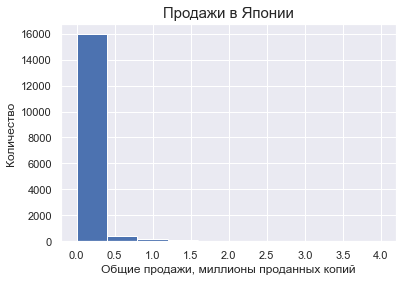

In [241]:
#чёткой корреляции не выявлено с выручкой, примерно на том же уровне, что и весь датасет
df.hist(column ='jp_sales', range=(0, 4));
plt.xlabel("Общие продажи, миллионы проданных копий", fontsize= 12)
plt.ylabel("Количество ", fontsize= 12)
plt.title("Продажи в Японии", fontsize= 15);

In [242]:
df[df['user_score'] == 'tbd']['rating'].value_counts()

E       1575
T        380
E10+     370
M         42
EC         7
Name: rating, dtype: int64

In [243]:
#также чёткой зависимости от рейтинга не выявлено
df['rating'].value_counts()

E       3990
T       2961
M       1563
E10+    1420
EC         8
K-A        3
RP         3
AO         1
Name: rating, dtype: int64

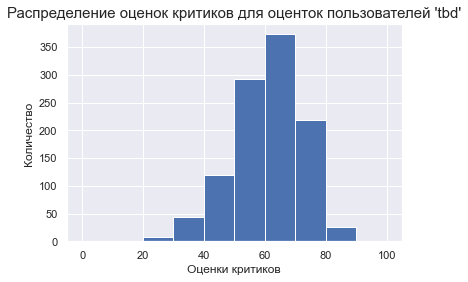

In [244]:
df[df['user_score'] == 'tbd']['critic_score'].plot(kind='hist', range=(0, 100))
plt.xlabel("Оценки критиков", fontsize= 12)
plt.ylabel("Количество ", fontsize= 12)
plt.title("Распределение оценок критиков для оценток пользователей 'tbd'", fontsize= 15);

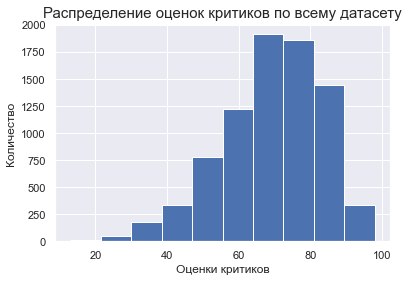

In [245]:
df['critic_score'].hist()
plt.xlabel("Оценки критиков", fontsize= 12)
plt.ylabel("Количество ", fontsize= 12)
plt.title("Распределение оценок критиков по всему датасету", fontsize= 15);
#также чёткой зависимости нет

In [246]:
df[df['user_score'] == 'tbd']['year_of_release'].value_counts()

2009    405
2010    331
2008    326
2007    240
2011    217
2002    192
2006    124
2005    121
2004    107
2003     95
2001     82
2000     43
2015     38
2016     34
2012     24
2014     21
2013     15
1999      8
1997      1
Name: year_of_release, dtype: int64

In [247]:
df['year_of_release'].value_counts()

2007    1466
2008    1427
2009    1426
2010    1255
2011    1136
2006    1006
2005     939
2002     829
2003     775
2004     762
2012     653
2015     606
2014     581
2013     544
2016     502
2001     482
1998     379
2000     350
1999     338
1997     289
1996     263
1995     219
1994     121
1993      60
1981      46
1992      43
1991      41
1982      36
1986      21
1983      17
1989      17
1987      16
1990      16
1988      15
1984      14
1985      14
1980       9
Name: year_of_release, dtype: int64

In [248]:
df[df['user_score'] == 'tbd']['platform'].value_counts()

DS      756
Wii     440
GBA     262
PS2     240
XB      150
PSP     123
GC      103
PS3      87
X360     84
3DS      56
PC       49
PS       45
XOne     11
PSV       7
PS4       6
WiiU      5
Name: platform, dtype: int64

In [249]:
df['platform'].value_counts()

PS2     2161
DS      2151
PS3     1331
Wii     1320
X360    1262
PSP     1209
PS      1197
PC       974
XB       824
GBA      822
GC       556
3DS      520
PSV      430
PS4      392
N64      319
XOne     247
SNES     239
SAT      173
WiiU     147
2600     133
NES       98
GB        98
DC        52
GEN       27
NG        12
SCD        6
WS         6
3DO        3
TG16       2
PCFX       1
GG         1
Name: platform, dtype: int64

In [250]:
df[df['user_score'] == 'tbd']['genre'].value_counts()

Misc            449
Sports          413
Action          376
Simulation      237
Racing          233
Puzzle          211
Adventure       159
Platform        139
Shooter          99
Fighting         39
Strategy         39
Role-Playing     30
Name: genre, dtype: int64

In [251]:
df['genre'].value_counts()

Action          3369
Sports          2348
Misc            1750
Role-Playing    1498
Shooter         1323
Adventure       1303
Racing          1249
Platform         888
Simulation       873
Fighting         849
Strategy         683
Puzzle           580
Name: genre, dtype: int64

Поскольку явной зависимости появления значения 'tbd' в столбце 'user_score' ни с какими другими данными не выявлено (то есть эта строка присутсвует и для разных годов/платформ/жанра/рейтинга и оценки китиков), то заменим значение 'tbd' на значение 0. Тогда будет удобно сделать срез, не учитывая эти значения.

In [252]:
#вначале заменим Nan в critic_score на 0. Для удобства выделения срезов и работы с датафреймом
df['critic_score'] = df['critic_score'].fillna(0)

In [253]:
#аналогично поступим с user_score
df['user_score'] = df['user_score'].fillna(0)

In [254]:
df['user_score'] = df['user_score'].replace('tbd', 0)


In [255]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16713 non-null  int64  
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     16713 non-null  float64
 9   user_score       16713 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(5), int64(1), object(5)
memory usage: 1.5+ MB


In [256]:
df['critic_score'].value_counts().head(10)

0.0     8576
70.0     256
71.0     254
75.0     245
78.0     240
73.0     238
80.0     237
76.0     235
74.0     226
72.0     226
Name: critic_score, dtype: int64

In [257]:
df['user_score'].value_counts().head(10)

0      9123
7.8     324
8       290
8.2     282
8.3     254
8.5     253
7.5     251
7.9     249
8.1     244
7.7     240
Name: user_score, dtype: int64

In [258]:
#переведем в числовое значение 
df['user_score'] = pd.to_numeric(df['user_score'])

In [259]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16713 non-null  int64  
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     16713 non-null  float64
 9   user_score       16713 non-null  float64
 10  rating           9949 non-null   object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


In [260]:
#добавим столбец с общей выручкой
df['total_sales'] = df['na_sales'] + df['eu_sales'] +df['jp_sales']

У нас остался один столбец с пропущенными значениями - rating. Пока этот столбец не будем изменять. Поскольку удалив сейчас - мы потеряем много данных по играм. Будем работать с этим столбцом далее, где потребуется анализ именно по рейтингу

### Вывод по предобработке данных


В ходе предобработки были выполнены следующие шаги:
- названия столбцов приведены в нижнему регистру;
- удалены 2 строки с отсутствующим названием игры и жанра;
- приведены данные по дате к формату год;
- был проведён анализ значения в столбце “user_score” 'tbd' (вероятнее всего эта отметка ставилась там, где информации не достаточно), закономерности от других показателей выявлено не было, поэтому это значение было заменено на 0 (для возможности дальнейшего анализа), а также значения в столбце приведены к числовому типу;
- выведен дополнительный столбец с значением общих продаж для игры;
- столбец rating также содержит пропуски, но удобнее будет их обработать когда будет проводиться анализ с данными в этом столбце.


<a id="years"></a>

## Анализ выпущенных игр по годам

In [261]:
df.groupby('year_of_release').count()

,name,platform,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
year_of_release,,,,,,,,,,,
1980,9,9,9,9,9,9,9,9,9,0,9
1981,46,46,46,46,46,46,46,46,46,0,46
1982,36,36,36,36,36,36,36,36,36,0,36
1983,17,17,17,17,17,17,17,17,17,0,17
1984,14,14,14,14,14,14,14,14,14,0,14
1985,14,14,14,14,14,14,14,14,14,1,14
1986,21,21,21,21,21,21,21,21,21,0,21
1987,16,16,16,16,16,16,16,16,16,0,16
1988,15,15,15,15,15,15,15,15,15,1,15


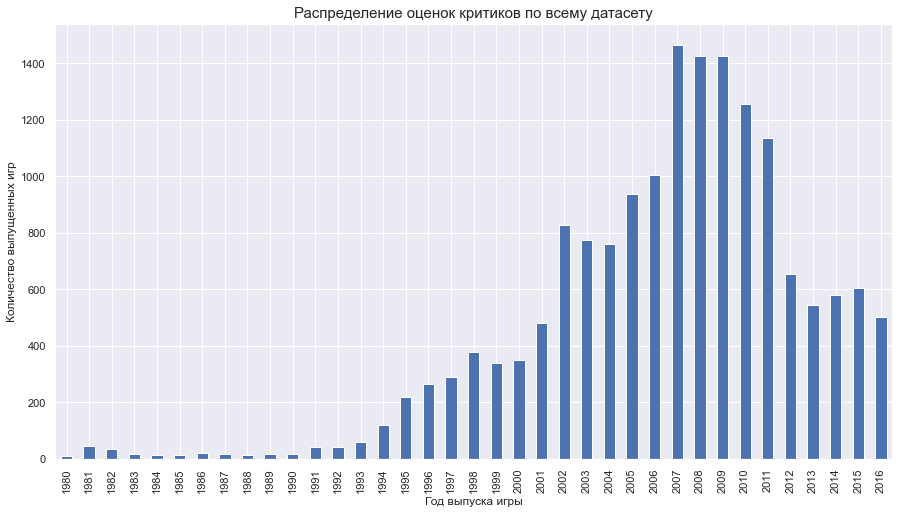

In [262]:
(df
    .groupby('year_of_release')['name'].count().reset_index()
    
    .plot(kind='bar', y = 'name', x = 'year_of_release', figsize=(15, 8), legend=False)
)
plt.xlabel("Год выпуска игры", fontsize= 12)
plt.ylabel("Количество выпущенных игр", fontsize= 12)
plt.title("Распределение оценок критиков по всему датасету", fontsize= 15)
plt.show()


### ВЫВОД ПО РАСПРЕДЕЛЕНИЮ ПО ГОДАМ


Видно, как выпуск игр рос с 1980 года (с развитием компьютерных технологий). Сильный скачок произошёл в 1995 году и продолжался рост количества выпускаемых игр. Пик пришёлся на 2008 год. Но вот после 2011 начался спад, который наблюдается и в настоящее время (2016 год)

<a id="platform"></a>

## Анализ данных по платформам

Выведем сводную таблицу по платформам и посмотрим ТОП-15. После этого создадим датафрейм df_platforms2 с этими платформами

In [263]:
df_platforms = df.groupby('platform')['total_sales'].sum().sort_values( ascending=False).head(15).reset_index()
df_platforms

,platform,total_sales
0,PS2,1062.33
1,X360,885.66
2,Wii,828.44
3,PS3,803.97
4,DS,746.86
5,PS,689.95
6,GBA,310.12
7,PS4,265.79
8,PSP,252.63
9,XB,249.02


In [264]:
df_platforms1 = df.pivot_table(index=['platform', 'year_of_release'], values = 'total_sales', aggfunc = 'sum').reset_index()
df_platforms1.sample(10)

,platform,year_of_release,total_sales
218,WiiU,2016,4.25
10,2600,2007,10.43
239,XB,2008,0.17
18,3DS,2015,26.75
240,XOne,2013,17.21
187,SCD,1993,1.45
58,GBA,2006,5.19
22,DC,2000,5.86
230,X360,2016,1.40
2,2600,1982,28.57


In [265]:
df_platforms2 = df_platforms1.merge(df_platforms, on = 'platform', how = 'right')
df_platforms2.sample(10)

,platform,year_of_release,total_sales_x,total_sales_y
19,X360,2012,91.45,885.66
94,XB,2002,46.32,249.02
16,X360,2009,109.26,885.66
71,GBA,2003,55.31,310.12
100,XB,2008,0.17,249.02
56,DS,2013,1.42,746.86
28,Wii,2010,117.73,828.44
125,NES,1993,3.55,245.74
138,PC,1995,3.99,237.14
129,3DS,2012,48.77,245.64


In [266]:
year_platform_min = df_platforms2.groupby('platform')['year_of_release'].min().reset_index()
year_platform_min.columns = ['platform', 'year_min']
year_platform_min

,platform,year_min
0,3DS,2007
1,DS,1985
2,GB,1988
3,GBA,2000
4,N64,1996
5,NES,1983
6,PC,1985
7,PS,1994
8,PS2,2000
9,PS3,2006


In [267]:
year_platform_max = df_platforms2.groupby('platform')['year_of_release'].max().reset_index()
year_platform_max.columns = ['platform', 'year_max']
year_platform_max

,platform,year_max
0,3DS,2016
1,DS,2013
2,GB,2007
3,GBA,2007
4,N64,2007
5,NES,1994
6,PC,2016
7,PS,2007
8,PS2,2011
9,PS3,2016


In [268]:
#выведем не только график датафрейма df_platforms2, но и сводную таблицу по годам для наглядности
year_platform = year_platform_min.merge(year_platform_max, on = 'platform')
year_platform.sort_values(by='year_min')

,platform,year_min,year_max
5,NES,1983,1994
1,DS,1985,2013
6,PC,1985,2016
2,GB,1988,2007
7,PS,1994,2007
4,N64,1996,2007
3,GBA,2000,2007
8,PS2,2000,2011
14,XB,2000,2008
11,PSP,2004,2015


<a id="platform1"></a>

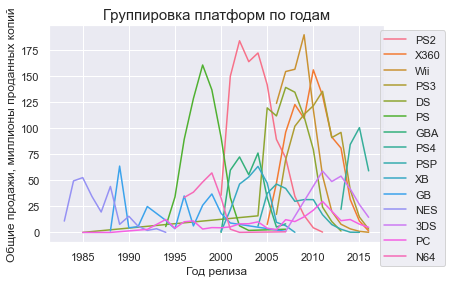

In [269]:
sns.lineplot(data=df_platforms2,
            
            x='year_of_release',
            y='total_sales_x',
            hue='platform',
            
            ci= None)
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1))
plt.xlabel("Год релиза", fontsize= 12)
plt.ylabel("Общие продажи, миллионы проданных копий", fontsize= 12)
plt.title("Группировка платформ по годам", fontsize= 15)
sns.set(rc={'figure.figsize':(10,5)})

<a id="platform2"></a>

### ВЫВОД ПО ВЫБОРУ АКТУАЛЬНОГО ПЕРИОДА


Отберём данные в изначальном датафрейме с 2004 по 2016 год. После 2004 года на рынке появляются и резко набирают обороты новые платформы, и с этого периода наблюдается резкий рост популярности игр, достигнув пика в 2008 году. Поэтому в анализе интересно посмотреть столь важный период для индустрии игр. 2016 год также будет учитывать, поскольку статиска по самому последнему году - самая актуальная, и отбрасив её, мы можем упустить некоторые важные тенденции


Cоздадим общий датафрейм и сводный по платформам, но не учитывая данные до 2004 года, но захватив небольшие платформы

In [270]:
df1 = df[df['year_of_release'] > 2004]

In [271]:
df_platforms_final = df1.pivot_table(index=['platform', 'year_of_release'], values = 'total_sales', aggfunc = 'sum').reset_index()
df_platforms_final.sort_values(by='total_sales').head(10)

,platform,year_of_release,total_sales
8,DC,2007,0.02
9,DC,2008,0.04
72,PSP,2015,0.12
90,Wii,2016,0.17
111,XB,2008,0.17
73,PSV,2007,0.23
71,PSP,2014,0.24
46,PS2,2011,0.35
26,N64,2007,0.60
19,GB,2007,0.99


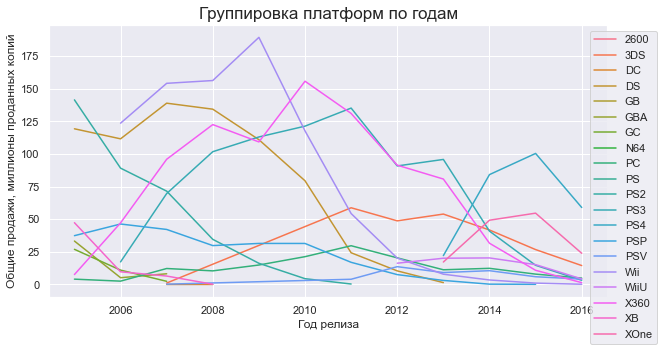

In [272]:
#построим аналогичный график, только для всех платформ и после 2004 года
sns.lineplot(data=df_platforms_final,
            
            x='year_of_release',
            y='total_sales',
            hue='platform',
            
            ci= None)
plt.legend(loc='upper right', bbox_to_anchor=(1.1, 1))
plt.xlabel("Год релиза", fontsize= 12)
plt.ylabel("Общие продажи, миллионы проданных копий", fontsize= 12)
plt.title("Группировка платформ по годам", fontsize= 17)
sns.set(rc={'figure.figsize':(10,5)})

### ПРОМЕЖУТОЧНЫЙ ВЫВОД ПО ПЛАТФОРМАМ

Видно, что с 2013 года наблюдается общий спад рынка игр. Выберем как наиболее потенциально прибыльные платформы:
PS4, XOne, 3DS, PC
В первую очередь ориентир был по прибыльности платформы в 2016 году. Далее обращалось внимание на тенденцию. У платформ PS4, XOne виден резкий рост с 2015 года и видно, что эти платформы лидируют. Платформы 3DS, PC выбраны как перспективные, поскольку у них нет сильной тенденции к понижению и в последние несколько лет они показывают довольно-таки стабильный результат.

<a id="platform3"></a>

## Анализ потенциально прибыльных платформ

Исследуем более детально выбранные платформы

In [273]:
platforms = ['PS4', 'XOne', '3DS', 'PC']
platforms

['PS4', 'XOne', '3DS', 'PC']

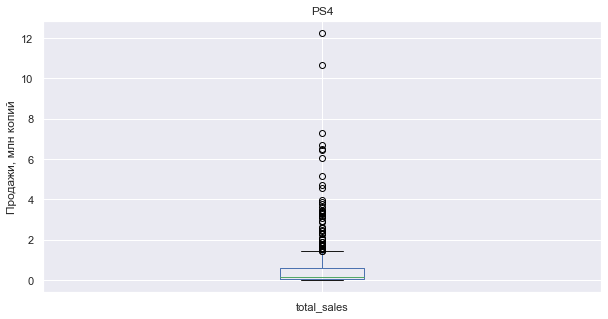

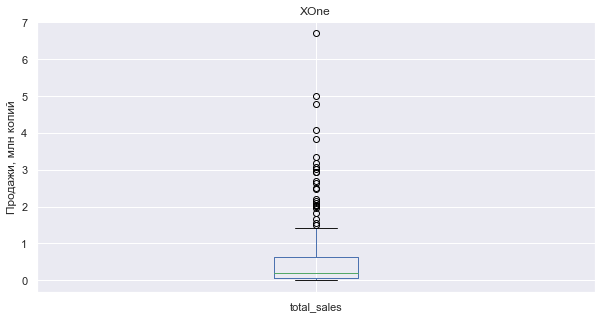

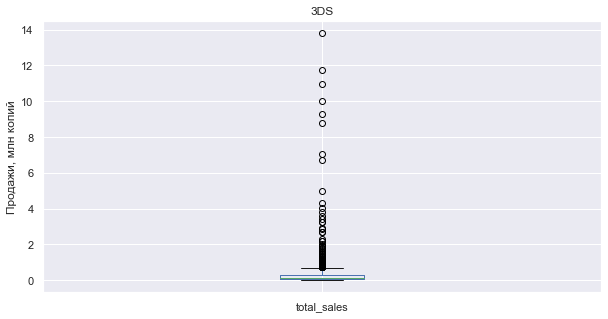

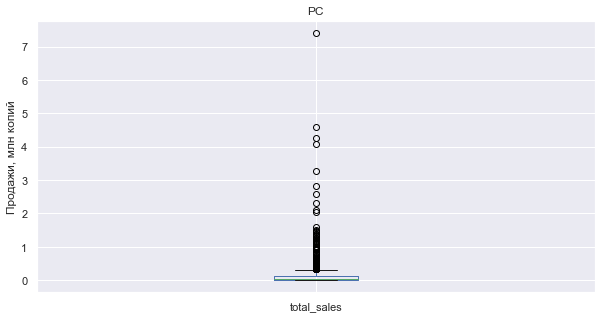

In [274]:
for a in platforms:
    df1[df1['platform'] == a]['total_sales'].plot(kind='box')
    plt.title(a)
    plt.ylabel('Продажи, млн копий')
    plt.show()  


In [275]:
#выведем также данные в числовом виде
for a in platforms:
    print(a)
    print(df1[df1['platform'] == a]['total_sales'].describe())
    print(df1[df1['platform'] == a]['total_sales'].min())
    print( )

PS4
count    392.000000
mean       0.678036
std        1.355221
min        0.010000
25%        0.050000
50%        0.170000
75%        0.612500
max       12.250000
Name: total_sales, dtype: float64
0.01

XOne
count    247.000000
mean       0.587247
std        0.942412
min        0.010000
25%        0.050000
50%        0.200000
75%        0.625000
max        6.710000
Name: total_sales, dtype: float64
0.01

3DS
count    520.000000
mean       0.472385
std        1.346870
min        0.010000
25%        0.050000
50%        0.120000
75%        0.312500
max       13.820000
Name: total_sales, dtype: float64
0.01

PC
count    830.000000
mean       0.183265
std        0.479607
min        0.010000
25%        0.020000
50%        0.040000
75%        0.140000
max        7.410000
Name: total_sales, dtype: float64
0.01



Слишком искажают статиску выбросы. Попробуем построить графики не учитывая слишком прибыльные игры. За выброс будет считать общие продажи > 3 стандартных отклонений

In [276]:
for a in platforms:
    outlier = 3*(df1[df1['platform'] == a]['total_sales'].std())
    print(a, outlier)

PS4 4.0656636216174125
XOne 2.8272346736818834
3DS 4.040611131902319
PC 1.438819825819408


In [277]:
platforms_dict = {'PS4': 4, 'XOne': 2.8, '3DS':4.04, 'PC':1.44}
platforms_dict

{'PS4': 4, 'XOne': 2.8, '3DS': 4.04, 'PC': 1.44}

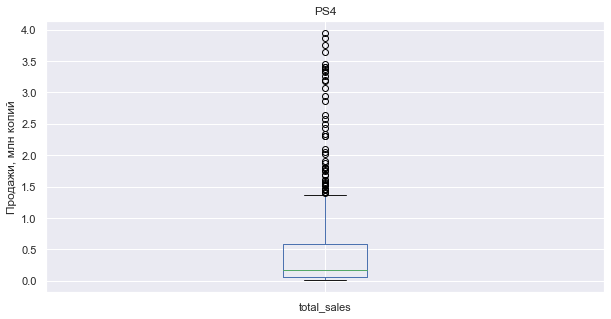

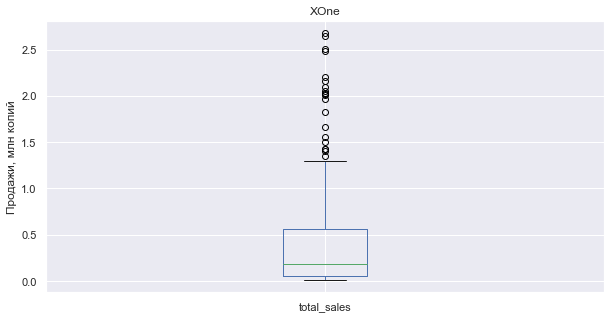

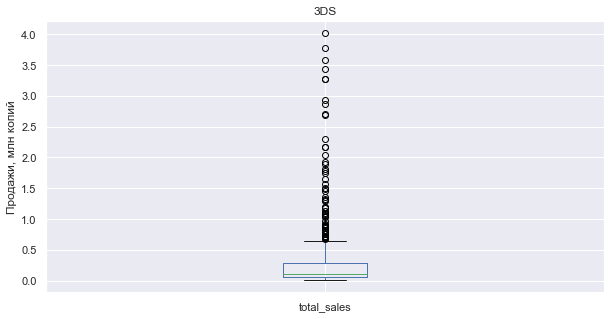

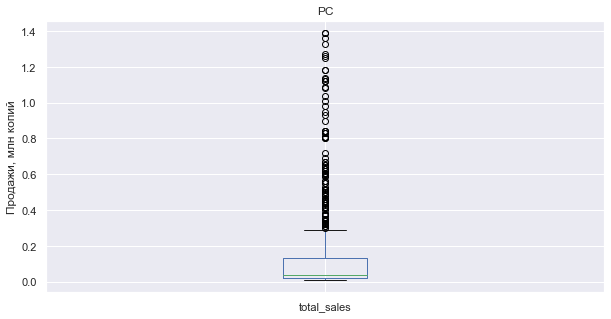

In [278]:
for a in platforms_dict:
    df1[df1['platform'] == a][df1['total_sales'] < platforms_dict[a]]['total_sales'].plot(kind='box')
    plt.title(a)
    plt.ylabel('Продажи, млн копий')
    plt.show()  

In [279]:
for a in platforms_dict:
    print(a)
    print(df1[df1['platform'] == a][df1['total_sales'] < platforms_dict[a]]['total_sales'].describe())
    print( )
    
   

PS4
count    382.000000
mean       0.511754
std        0.805099
min        0.010000
25%        0.050000
50%        0.170000
75%        0.577500
max        3.950000
Name: total_sales, dtype: float64

XOne
count    236.000000
mean       0.432966
std        0.577014
min        0.010000
25%        0.050000
50%        0.185000
75%        0.562500
max        2.680000
Name: total_sales, dtype: float64

3DS
count    510.000000
mean       0.309843
std        0.557878
min        0.010000
25%        0.050000
50%        0.110000
75%        0.290000
max        4.020000
Name: total_sales, dtype: float64

PC
count    816.000000
mean       0.135515
std        0.233062
min        0.010000
25%        0.020000
50%        0.040000
75%        0.130000
max        1.390000
Name: total_sales, dtype: float64



Дополнительно выведем боксплоты на отдельном графике и параметром showfliers = False, который автоматически не будет учитывать выбросы

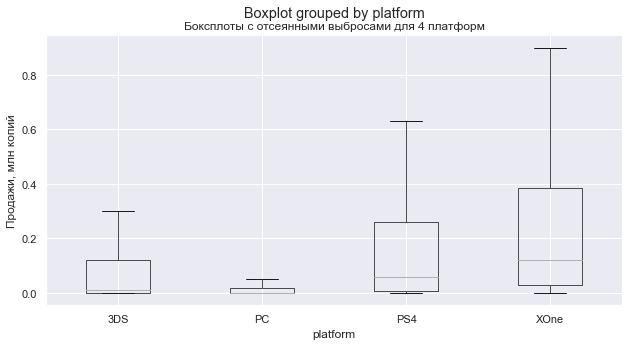

In [280]:
df.query('platform in ("PS4", "XOne", "3DS", "PC")').boxplot (column='na_sales', by='platform',  showfliers = False)
plt.title('Боксплоты с отсеянными выбросами для 4 платформ')
plt.ylabel('Продажи, млн копий')
plt.show()

### ПРОМЕЖУТОЧНЫЙ ВЫВОД ПО РАССМОТРЕННЫМ ПОТЕНЦИАЛЬНО ПРИБЫЛЬНЫМ ПЛАТФОРМАМ


По построенным боксплотам и введенным числовым характеристикам видно, что у всех платформ есть популярные игры, которые вероятно обуславливают прибыльность платформ. Показательно привести максимальные значение и среднее для каждой платформы:
- платформы PC максимально прибыльная игра принесла 7.41 млн проданных копий, однако среднее значение 0.18 млн копий;
- платформы 3DS максимально прибыльная игра принесла 13.82 млн проданных копий, однако среднее значение 0.47 млн копий;
- платформы XOne максимально прибыльная игра принесла 6.71 млн проданных копий, однако среднее значение 0.59 млн копий;
- платформы PC максимально прибыльная игра принесла 12.25 млн проданных копий, однако среднее значение 0.68 млн копий;
Это означает, что успех продаж игр не только зависит от платформы, а и от других характеристик игры. У одной и той же платформы могут быть как очень успешные игры, так и игры с минимальными продажами. 

На основе анализа рекомендованные платформы  PS4, XOne. Это актуальные, популярные платформы на сегодняшний день, на котороых средняя прибыльность продаваемых игр максимальна (исходя из покатаеля mean). Видно. что по количеству игр эти платформы не лидируют, но большинство игр, выпущенных на этих платформах, хорошо продаются

<a id="platform4"></a>

## Анализ на примере одной платформы влияния отзывов на продажи.

Выберем платформу для анализа. Посмотрим ТОП платформ по суммарным продажам и укажем срез от 2010 года (тем самым отберём актульные платформы)

In [281]:
df1.query('year_of_release > 2010').groupby('platform')['total_sales'].sum().sort_values(ascending=False)

platform
PS3     380.75
X360    347.25
PS4     265.79
3DS     244.54
XOne    145.05
Wii      87.13
PC       86.58
WiiU     76.24
PSV      47.38
DS       36.14
PSP      28.00
PS2       0.35
Name: total_sales, dtype: float64

Выберем для анализа платформу 3DS, поскольку эта платформа показывает по продажам стабильный результат, на ней выпускается много игр и она актуальна в 2016 году 

In [282]:
df1.query('platform == "3DS"').sort_values(by='year_of_release', ascending=False)


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
9719,Lego Star Wars: The Force Awakens,3DS,2016,Action,0.04,0.07,0.01,0.01,0.0,7.8,E10+,0.12
14155,PriPara Mezameyo! Megami no Dress Design,3DS,2016,Action,0.00,0.00,0.03,0.00,0.0,0.0,NaN,0.03
13425,12-Sai. Koisuru Diary,3DS,2016,Adventure,0.00,0.00,0.05,0.00,0.0,0.0,NaN,0.05
13552,Card Fight!! Vanguard G: Stride to Victory!!,3DS,2016,Misc,0.00,0.00,0.04,0.00,0.0,0.0,NaN,0.04
13794,Haikyu!! Cross Team Match!,3DS,2016,Adventure,0.00,0.00,0.04,0.00,0.0,0.0,NaN,0.04
...,...,...,...,...,...,...,...,...,...,...,...,...
11377,Face Racers: Photo Finish,3DS,2007,Racing,0.08,0.00,0.00,0.01,0.0,0.0,E,0.08
5874,Harvest Moon: The Tale of Two Towns,3DS,2007,Simulation,0.28,0.00,0.00,0.02,0.0,0.0,NaN,0.28
7848,Pet Zombies,3DS,2007,Simulation,0.18,0.00,0.00,0.01,0.0,0.0,T,0.18
15338,Mario Tennis,3DS,2007,Sports,0.00,0.00,0.02,0.00,0.0,0.0,NaN,0.02


In [283]:
df_3DS = df1.query('platform == "3DS"')
df_3DS.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 520 entries, 33 to 16688
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             520 non-null    object 
 1   platform         520 non-null    object 
 2   year_of_release  520 non-null    int64  
 3   genre            520 non-null    object 
 4   na_sales         520 non-null    float64
 5   eu_sales         520 non-null    float64
 6   jp_sales         520 non-null    float64
 7   other_sales      520 non-null    float64
 8   critic_score     520 non-null    float64
 9   user_score       520 non-null    float64
 10  rating           228 non-null    object 
 11  total_sales      520 non-null    float64
dtypes: float64(7), int64(1), object(4)
memory usage: 52.8+ KB


Построим скаттерплоты для среза с рассматриваемой платформой и всем датафреймом. а также посчаем коэффициент корреляции 

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='user_score', ylabel='total_sales'>

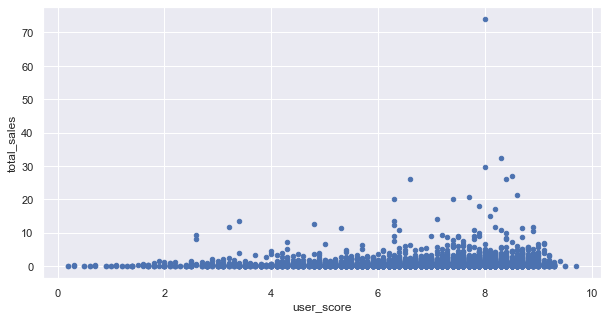

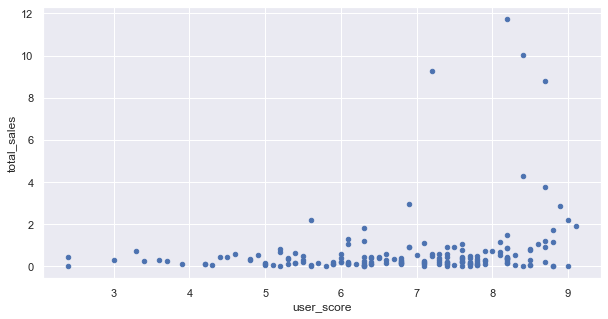

In [284]:
(df1
    .query('user_score > 0') 
    .plot(x='user_score', y='total_sales', kind='scatter')
)

(df_3DS
    .query('user_score > 0') 
    .plot(x='user_score', y='total_sales', kind='scatter')
) 

In [285]:
df1.query('user_score > 0')['user_score'].corr(df1['total_sales'])

0.07836095465760931

In [286]:
df_3DS.query('user_score > 0')['user_score'].corr(df_3DS['total_sales'])

0.22705554104025105

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='critic_score', ylabel='total_sales'>

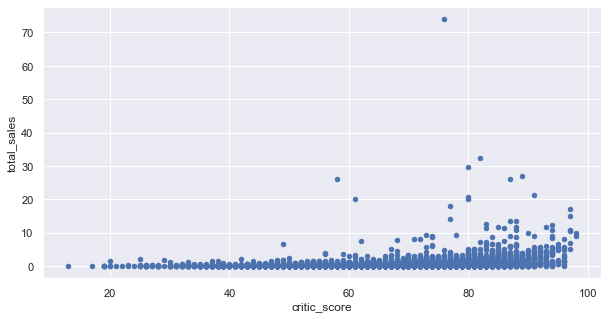

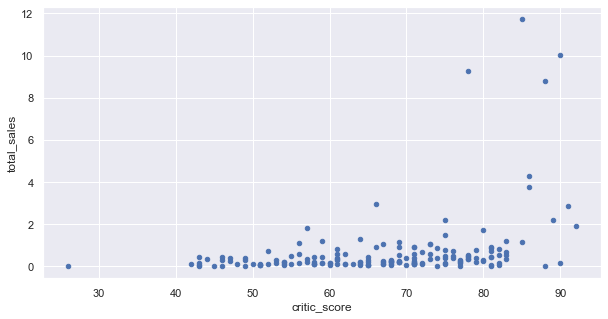

In [287]:
(df1
    .query('critic_score > 0') 
    .plot(x='critic_score', y='total_sales', kind='scatter')
)
(df_3DS
    .query('critic_score > 0') 
    .plot(x='critic_score', y='total_sales', kind='scatter')
)

In [288]:
df1.query('critic_score > 0')['critic_score'].corr(df1['total_sales'])


0.22981317709928656

In [289]:
df_3DS.query('critic_score > 0')['critic_score'].corr(df_3DS['total_sales'])

0.3506217069195201

### ПРОМЕЖУТОЧНЫЙ ВЫВОД ПО ВЛИЯНИЮ ПРОДАЖ И ОЦЕНКИ ПОЛЬЗОВАТЕЛЕЙ И КРИТИКОВ


Коэффициент корреляции и для пользовательских оценок, и для оценок критиков по отношению к общим продажам менее 0.5, что говорит о том, что оценки не имеют очень сильного влияения на продажи. Особенно низкий коэффициент корреляции для всего датафрейма и пользовательских оценок (-0.01), что свиделельствует о минимальнй взаимосвязи этих факторов. Чуть больше коэффициент корреляции для рассматриваемой платформы 3DS (0.22), который не так велик из-за тех игр, которые хорошо продавались, но имели низкие оценки (как ни странно). Также есть игры, которые имеют высокие оценки и низкие продажи. Это видно на графике. В построенных графиках чётко прослеживается тот факт, что игры с высокими продажами чаще всего имеют высокие оценки (особенно это актуально для оценок критиков).

<a id="genre"></a>

## Анализ зависимости продаж и жанра игр

In [290]:
#посмотрим самые прибыльные жанры
df_genre = df1.groupby('genre')['total_sales'].sum().reset_index()
df_genre.sort_values(by='total_sales', ascending=False)

,genre,total_sales
0,Action,1086.28
10,Sports,770.12
8,Shooter,680.01
3,Misc,562.33
7,Role-Playing,510.23
6,Racing,314.79
4,Platform,275.14
9,Simulation,247.15
2,Fighting,187.78
1,Adventure,140.91


Text(0.5, 0, ' ')

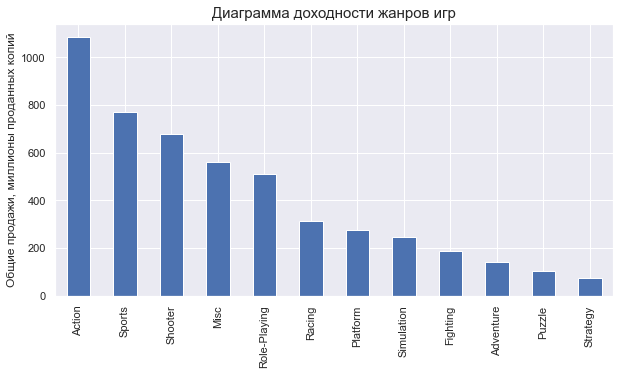

In [291]:
#визуализируем результат
(df_genre
    .sort_values(by='total_sales', ascending=False)
    .plot(kind='bar', x = 'genre', legend = False)
)

plt.title('Диаграмма доходности жанров игр', fontsize= 15)


plt.ylabel("Общие продажи, миллионы проданных копий", fontsize= 12)
plt.xlabel(" ", fontsize= 12)


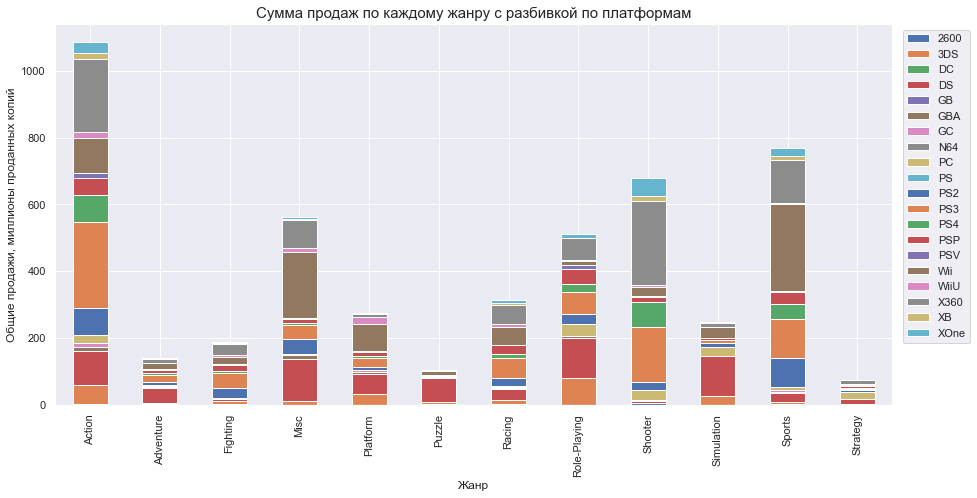

In [292]:
#построим график соотношения жанров и платформ
(df1
    .pivot_table(index='genre', columns = 'platform', values='total_sales', aggfunc = 'sum')
    .plot(kind='bar', stacked = True,  figsize = (15, 7), legend=True)
)
plt.legend(loc='upper right', bbox_to_anchor=(1.1, 1))
plt.xlabel("Жанр", fontsize= 12)
plt.ylabel("Общие продажи, миллионы проданных копий", fontsize= 12)
plt.title("Сумма продаж по каждому жанру с разбивкой по платформам", fontsize= 15)
plt.show()

### ВЫВОД ПО ПРИБЫЛЬНОСТИ ЖАНРОВ

Очевидными лидерами по прибыльности являются:
- Action, продано 1086.28 млн копий;
- Sports, продано 770.12 млн копий;
- Shooter, продано 680.01 млн копий;
Также в пятёрке лидеров:
- Misc, продано 562.33 млн копий;
- Role-Playing	510,23 млн копий.

У остальных жанров игр продажи менее 315 млн копий.

Примечательно, что лидирующие платформы по прибыли выпускают в большинстве популярные жанры (например платформа 3DS выпускает чаще всего игры в жанрах Action/Sports/Shooter).
Рекомендованные жанры - из первой тройки

<a id="region"></a>

## Портрет пользователя каждого региона

Построим наглядный график для анализа. Можно сделать и одну диаграмму, но 3 удобны тем, что можно смотреть интересующий регион и по нему сравнение с другими

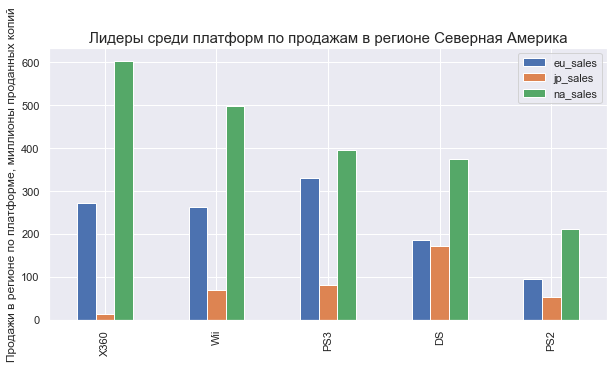

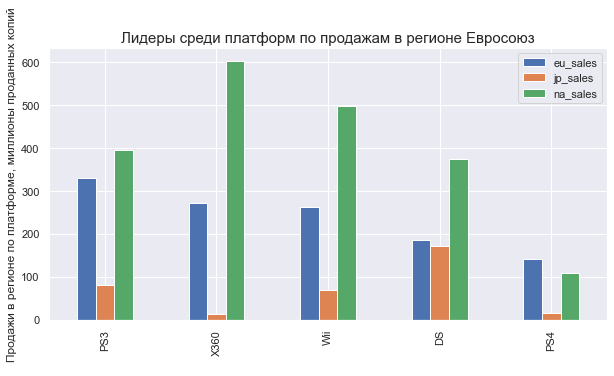

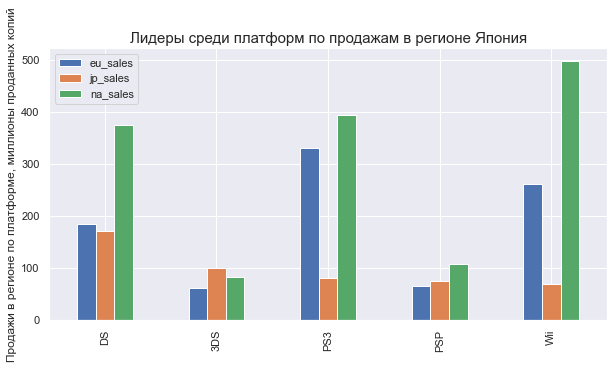

In [293]:

regions = {'na_sales':'Северная Америка', 'eu_sales': 'Евросоюз', 'jp_sales':'Япония'}

for i in regions:
    (df1
        .pivot_table(index='platform', values = regions, aggfunc = 'sum') 
        .sort_values(by=i, ascending=False)
        .head(5)
        .plot(kind='bar')
    )
    r = regions[i]
    plt.title(f'Лидеры среди платформ по продажам в регионе {r}', fontsize= 15)
    plt.ylabel("Продажи в регионе по платформе, миллионы проданных копий", fontsize= 12)
    plt.xlabel(" ", fontsize= 12)

### ВЫВОД ПО ПОПУЛЯРНЫМ ПЛАТФОРМАМ ПО РЕГИОНАМ


- тройка лидеров в Северной Америке - X360, Wii, PS3 (что примерн соотносится с общим рейтингом)
- тройка лидеров в Европе аналогична, только все платформы поменялись местами - PS3, X360, Wii
- в Японии продажи игр меньше чем в Северной Америке и ЕС, и платформы несколько иные - DS, 3DS, PS3


In [294]:
genres = df1['genre'].unique()
genres

array(['Sports', 'Racing', 'Platform', 'Misc', 'Simulation', 'Action',
       'Role-Playing', 'Puzzle', 'Shooter', 'Fighting', 'Adventure',
       'Strategy'], dtype=object)

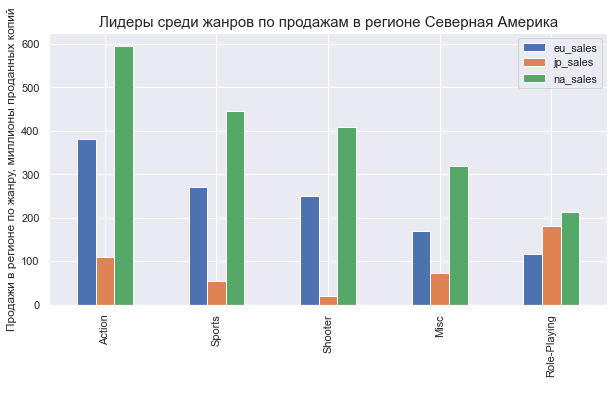

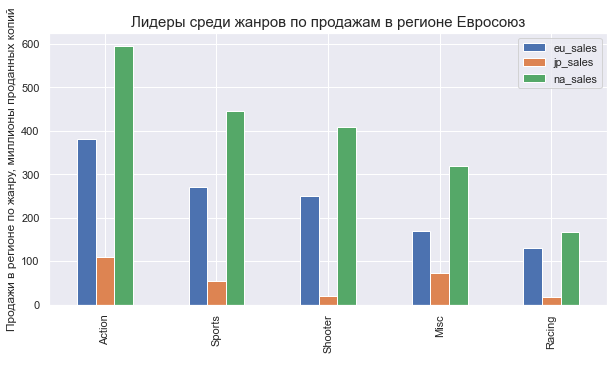

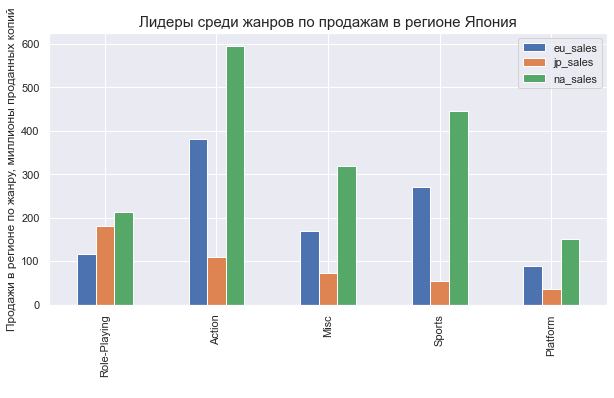

In [295]:


for i in regions:
    (df1
        .pivot_table(index='genre', values = regions, aggfunc = 'sum') 
        .sort_values(by=i, ascending=False)
        .head(5)
        .plot(kind='bar')
    )
    r = regions[i]
    plt.title(f'Лидеры среди жанров по продажам в регионе {r}', fontsize= 15)
    plt.ylabel("Продажи в регионе по жанру, миллионы проданных копий", fontsize= 12)
    plt.xlabel(" ", fontsize= 12)

## ВЫВОД ПО ПОПУЛЯРНЫМ ЖАНРАМ ДЛЯ КАЖДОГО РЕГИОНА


ЕС и Северная Америка сходны по своим предпочтениям, тройка лидеров соотносится с тройкой лидеров по всему миру:
- Action
- Sports
- Shooter

И интересен рейтинг жанров в Японии, который отличается от ЕС и Северной Америки. Тройка лидеров выглядит так:
- Role_playing (в ЕС этот жанр даже не вошёл в пятёрку)
- Action
- Misc
Также примечательно, что в Японии в пятёрке лидеров нет Shooter. Возможно, в Японии более популярны более сложные, неагрессивные и интеллектуальные игры

Но Если необходимо выбрать жанр, популярные везде, то это Action


<a id="rating"></a>

## Анализ влияния рейтинга на продажи

Для анализа необходимы данные только с рейтингом. Однако рейтинг есть не для всех игр. Мы не можем проставить рейтинг на основе данных, поскольку это значение присваивается для конкретной игры. Значит, нам придётся удалить сточки из рассматриваемого датафрейма с играми, где нет рейтинга

In [296]:
df_raiting = df1.dropna(subset=['rating'])

In [297]:
df_raiting['rating'].value_counts()

E       2742
T       2069
E10+    1406
M       1262
EC         8
RP         3
AO         1
Name: rating, dtype: int64

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


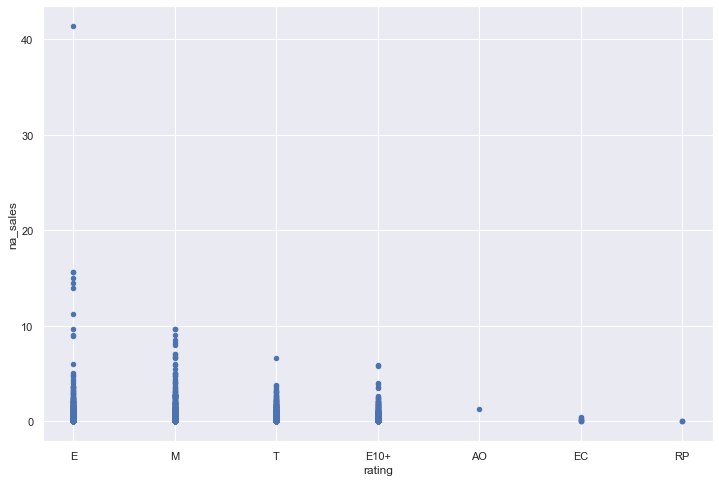

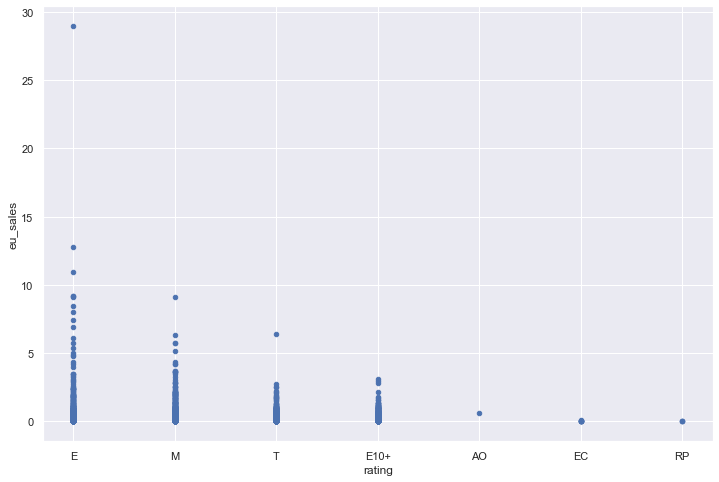

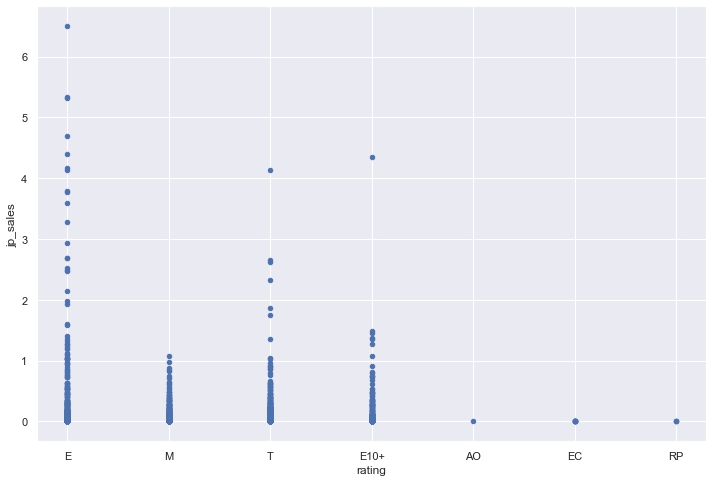

In [298]:
#попробуем вывести на графике сумму продаж для определённого региона и соответсвующий рейтинг
for i in regions:
    df_raiting[['rating',i]].plot(
    kind='scatter',
    x='rating',
    y = i,
    figsize=(12,8)
)
    

In [299]:
#на основе приведённых графиков отсортируем выбросы и посмотрим на суммарное и медианное значение продаж для каждого рейтинга

df_raiting = df_raiting.query('na_sales < 20 and eu_sales <15')
df_raiting.sample(10)


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
1345,Hasbro Family Game Night,Wii,2008,Puzzle,0.96,0.33,0.00,0.13,63.0,7.5,E,1.29
8277,Hitman: HD Trilogy,X360,2013,Action,0.07,0.08,0.00,0.02,69.0,7.2,M,0.15
8045,Summer Athletics: The Ultimate Challenge,PS2,2008,Sports,0.00,0.00,0.00,0.18,0.0,0.0,E,0.00
14190,The Cursed Crusade,PC,2011,Action,0.00,0.03,0.00,0.01,55.0,6.0,M,0.03
6353,R.U.S.E.,PC,2010,Strategy,0.04,0.19,0.00,0.04,76.0,8.1,T,0.23
2074,Rayman Origins,PS3,2011,Platform,0.33,0.49,0.01,0.17,87.0,8.4,E10+,0.83
1611,[Prototype],PS3,2009,Action,0.65,0.40,0.00,0.19,79.0,7.7,M,1.05
8036,Mahjong: Journey Quest for Tikal,DS,2008,Puzzle,0.15,0.02,0.00,0.01,0.0,0.0,E,0.17
13749,Capcom Fighting Evolution,XB,2005,Fighting,0.03,0.01,0.00,0.00,61.0,0.0,T,0.04
12433,Earth Defense Force 2017 Portable,PSV,2012,Action,0.00,0.00,0.06,0.00,68.0,7.9,T,0.06


In [300]:
df_raiting_pivot = df_raiting.pivot_table(index = 'rating', values=['na_sales', 'eu_sales', "jp_sales"], aggfunc=['sum', 'mean']).reset_index()

In [301]:
df_raiting_pivot

rating      sum                        mean                    
         eu_sales jp_sales na_sales  eu_sales  jp_sales  na_sales
0     AO     0.61     0.00     1.26  0.610000  0.000000  1.260000
1      E   486.13   143.71   850.49  0.177355  0.052430  0.310285
2   E10+   187.09    39.05   350.84  0.133065  0.027774  0.249531
3     EC     0.11     0.00     1.53  0.013750  0.000000  0.191250
4      M   418.08    46.89   612.93  0.331284  0.037155  0.485681
5     RP     0.08     0.00     0.00  0.026667  0.000000  0.000000
6      T   263.41    92.02   491.23  0.127313  0.044476  0.237424

In [302]:
df_raiting_pivot.columns = ['rating', 'eu_sales_sum', 'jp_sales_sum', 'na_sales_sum', 'eu_sales_mean', 'jp_sales_mean', 'na_sales_mean']

In [303]:
df_raiting_pivot.sort_values(by='na_sales_sum', ascending=False)

,rating,eu_sales_sum,jp_sales_sum,na_sales_sum,eu_sales_mean,jp_sales_mean,na_sales_mean
1,E,486.13,143.71,850.49,0.177355,0.052430,0.310285
4,M,418.08,46.89,612.93,0.331284,0.037155,0.485681
6,T,263.41,92.02,491.23,0.127313,0.044476,0.237424
2,E10+,187.09,39.05,350.84,0.133065,0.027774,0.249531
3,EC,0.11,0.00,1.53,0.013750,0.000000,0.191250
0,AO,0.61,0.00,1.26,0.610000,0.000000,1.260000
5,RP,0.08,0.00,0.00,0.026667,0.000000,0.000000


Text(0.5, 0, 'Рейтинг от организации ESRB')

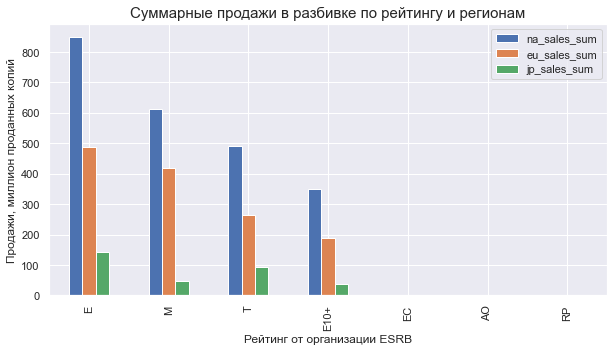

In [304]:
#построим более показательный график с общей прибылью по регионам
(df_raiting_pivot
    .sort_values(by='na_sales_sum', ascending=False)
    .plot (kind='bar', y=['na_sales_sum', 'eu_sales_sum', 'jp_sales_sum'], x = 'rating')
)
plt.title('Суммарные продажи в разбивке по рейтингу и регионам', fontsize= 15)
plt.ylabel("Продажи, миллион проданных копий", fontsize= 12)
plt.xlabel('Рейтинг от организации ESRB', fontsize= 12)

In [305]:
df1_raiting_pivot = df1.pivot_table(index = 'rating', values=['na_sales', 'eu_sales', "jp_sales"], aggfunc=['sum', 'mean']).reset_index()

In [306]:
df1_raiting_pivot

rating      sum                        mean                    
         eu_sales jp_sales na_sales  eu_sales  jp_sales  na_sales
0     AO     0.61     0.00     1.26  0.610000  0.000000  1.260000
1      E   515.09   147.48   891.85  0.187852  0.053786  0.325255
2   E10+   187.09    39.05   350.84  0.133065  0.027774  0.249531
3     EC     0.11     0.00     1.53  0.013750  0.000000  0.191250
4      M   418.08    46.89   612.93  0.331284  0.037155  0.485681
5     RP     0.08     0.00     0.00  0.026667  0.000000  0.000000
6      T   263.41    92.02   491.23  0.127313  0.044476  0.237424

Интересно сопоставить результаты для всего датафрейма (тех ячеек, где не данных о рейтинге). Для выделения таких ячеек введём дополнительное обозначение No_Rating и построим аналогичный график

In [307]:
df1['rating'] = df1['rating'].fillna('NoRating')

In [308]:
df1_raiting_pivot = df1.pivot_table(index = 'rating', values=['na_sales', 'eu_sales', "jp_sales"], aggfunc=['sum', 'mean']).reset_index()

In [309]:
df1['rating'].value_counts()

NoRating    4050
E           2742
T           2069
E10+        1406
M           1262
EC             8
RP             3
AO             1
Name: rating, dtype: int64

In [310]:
df1_raiting_pivot.columns = ['rating', 'eu_sales_sum', 'jp_sales_sum', 'na_sales_sum', 'eu_sales_mean', 'jp_sales_mean', 'na_sales_mean']

Text(0.5, 0, 'Рейтинг от организации ESRB')

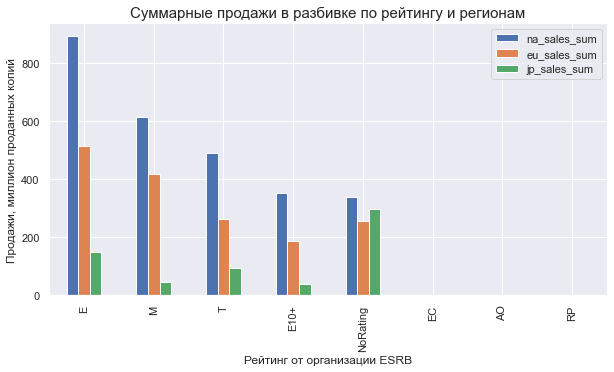

In [311]:
(df1_raiting_pivot
    .sort_values(by='na_sales_sum', ascending=False)
    .plot (kind='bar', y=['na_sales_sum', 'eu_sales_sum', 'jp_sales_sum'], x = 'rating')
)
plt.title('Суммарные продажи в разбивке по рейтингу и регионам', fontsize= 15)
plt.ylabel("Продажи, миллион проданных копий", fontsize= 12)
plt.xlabel('Рейтинг от организации ESRB', fontsize= 12)

### ВЫВОД О ВЛИЯНИИ РЕЙТИНГА ПО ПРОДАЖАМ

- по суммарным продажам во всех регионах лидируют игры с рейтингом E. Но игр с таким рейтингом - большинство. Поэтому при анализе интересно посмотреть на среднее количество проданных млн копий для каждого рейтинга. и здесь мы видим,что среднее кол-во проданных млн копий для рейтинга E лидирует только в Японии, в ЕС и Штатах рейтинг Е заниамет второе место.
- второе место по суммарным продажам в ЕС и Штатах опять одинаково - М, этот рейтинг в среднем как раз на первом месте для этих стран. И опять-таким выделяется Япония, где на втором месте по популярности игры с рейтингом Т (в ЕС и Штатах игры с таким рейтингом на третьем месте)
- стоит обратить внимание на игры в рейтингом AO, которых выпускается немного, но все они хорошо продаются (в ЕС и Штатах), о чём говорит самое высокое среднее	
- в Японии большинство продаж игр не имеют рейтинга. Возможно, эти игры были разработаны в Японии и не участвуют в международной системе оценок

<a id="hyp"></a>

## Проверка гипотез

<a id="hyp1"></a>

**Проверка гипотезы - средние пользовательские рейтинги платформ Xbox One и PC одинаковые**  

Применим алгоритм проверки гипотезы о равенстве средних независимых двух генеральных совокупностей. Здесь важно пояснить, почему применяется тест имено для независимых совокупностей. Предположим, что у одного и того же пользователя может использоваться только одна платформа. Значит, это разные пользователи - то есть выборки. Выделим 2 выборки - по каждой платформе и наличию пользовательских рейтингов. Для указания значения параметра equal_var проверим данные на нормальность, затем на равенство дисперсий, и затем провердём т-тест. alpha выберем 0.05

Нулевая гипотеза H0 - средние пользовательские рейтинги платформ Xbox One и PC одинаковые  
Альтернативная гипотеза H1 - средние пользовательские рейтинги платформ Xbox One и PC различается

In [312]:
df[df['platform'] == 'Xbox_One']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales


In [313]:
platform_Xbox_One = df1[df1['platform'] == 'XOne'][df1['user_score'] > 0]['user_score'].reset_index()

platform_Xbox_One = platform_Xbox_One.drop(['index'], axis = 1)
platform_Xbox_One.head(5)

,user_score
0,7.9
1,5.4
2,6.4
3,6.2
4,4.1


In [314]:
platform_PC = df1[df1['platform'] == 'PC'][df1['user_score'] > 0]['user_score'].reset_index()

platform_PC = platform_PC.drop(['index'], axis = 1)
platform_PC.head(5)

,user_score
0,7.6
1,4.0
2,8.2
3,7.9
4,8.1


In [315]:
from scipy import stats

alpha = .05

shapiro_test_Xbox_One = stats.shapiro(platform_Xbox_One)
shapiro_test_PC = stats.shapiro(platform_PC)



print('p-значение Xbox One:', shapiro_test_Xbox_One)

if shapiro_test_Xbox_One[0] < alpha:
    print("Отвергаем нулевую гипотезу - данные не распределены нормально")
else:
    print("Не получилось отвергнуть нулевую гипотезу. Данные распределены нормально")

print('p-значение PC:', shapiro_test_PC)

if shapiro_test_PC[0] < alpha:
    print("Отвергаем нулевую гипотезу - данные не распределены нормально")
else:
    print("Не получилось отвергнуть нулевую гипотезу. Данные распределены нормально")

p-значение Xbox One: ShapiroResult(statistic=0.955055296421051, pvalue=1.5248597264871933e-05)
Не получилось отвергнуть нулевую гипотезу. Данные распределены нормально
p-значение PC: ShapiroResult(statistic=0.9147876501083374, pvalue=8.724030936291845e-19)
Не получилось отвергнуть нулевую гипотезу. Данные распределены нормально


In [316]:
from scipy.stats import bartlett

alpha = .05

result_bartlett = bartlett(platform_Xbox_One['user_score'], platform_PC['user_score'])

print('p-значение:', result_bartlett.pvalue)

if result_bartlett.pvalue < alpha:
    print("Отвергаем нулевую гипотезу. Дисперсии выборок не равны.")
else:
    print("Не получилось отвергнуть нулевую гипотезу. Дисперсии выборок равны.")

p-значение: 0.13183587902366786
Не получилось отвергнуть нулевую гипотезу. Дисперсии выборок равны.


In [317]:
alpha = .05

results = st.ttest_ind(
    platform_Xbox_One, 
    platform_PC, equal_var = True)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: [0.00355849]
Отвергаем нулевую гипотезу


### ВЫВОД


Проверка гипотезы показала, что средние пользовательские рейтинги платформ Xbox One и PC различаются 

<a id="hyp2"></a>

**Проверка гипотезы - Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные**  

Проверка гипотез будет аналогична

Нулевая гипотеза H0 - Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») одинаковые  

Альтернативная гипотеза H1 - Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные

In [318]:
genre_Action = df1[df1['genre'] == 'Action'][df1['user_score'] > 0]['user_score'].reset_index()

genre_Action = genre_Action.drop(['index'], axis = 1)
genre_Action.head(5)

,user_score
0,8.2
1,8.1
2,8.3
3,7.9
4,7.5


In [319]:
genre_Sports = df1[df1['genre'] == 'Sports'][df1['user_score'] > 0]['user_score'].reset_index()

genre_Sports = genre_Sports.drop(['index'], axis = 1)
genre_Sports.head(5)

,user_score
0,8.0
1,8.0
2,7.7
3,7.4
4,4.3


In [320]:
alpha = .05

shapiro_test_Action = stats.shapiro(genre_Action)
shapiro_test_Sports = stats.shapiro(genre_Sports)



print('p-значение Action:', shapiro_test_Action)

if shapiro_test_Action[0] < alpha:
    print("Отвергаем нулевую гипотезу - данные не распределены нормально")
else:
    print("Не получилось отвергнуть нулевую гипотезу. Данные распределены нормально")

print('p-значение Sports:', shapiro_test_Sports)

if shapiro_test_Sports[0] < alpha:
    print("Отвергаем нулевую гипотезу - данные не распределены нормально")
else:
    print("Не получилось отвергнуть нулевую гипотезу. Данные распределены нормально")

p-значение Action: ShapiroResult(statistic=0.9324215054512024, pvalue=1.746022942640114e-25)
Не получилось отвергнуть нулевую гипотезу. Данные распределены нормально
p-значение Sports: ShapiroResult(statistic=0.9333926439285278, pvalue=3.8469428186110704e-18)
Не получилось отвергнуть нулевую гипотезу. Данные распределены нормально


In [321]:
alpha = .05

result_bartlett = bartlett(genre_Action['user_score'], genre_Sports['user_score'])

print('p-значение:', result_bartlett.pvalue)

if result_bartlett.pvalue < alpha:
    print("Отвергаем нулевую гипотезу. Дисперсии выборок не равны.")
else:
    print("Не получилось отвергнуть нулевую гипотезу. Дисперсии выборок равны.")

p-значение: 1.1469549090788683e-08
Отвергаем нулевую гипотезу. Дисперсии выборок не равны.


In [322]:
alpha = .05

results = st.ttest_ind(genre_Action, genre_Sports, equal_var = False)

print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 


p-значение:  [3.40132413e-08]
Отвергаем нулевую гипотезу


## ВЫВОД

Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные

<a id="end"></a>

# ОБЩИЙ ВЫВОД

Была поставлена задача в определении закономерностей, которые определяли успешность игры. Ниже краткий вывод по проведённому анализу.  

    - была проведена первичная предобработка данных с приведением к нужному типу, заполнением пропусков и удалением неактуальной и не подлежащей восстановлению информации;
    - был проведён анализ по географии продаж игр, в котором выявлены примерно сходные предпочтения в странах Северной Америки и ЕС, и несколько отличающиеся в Японии. В Японии продажи игр несоизмеримо меньше, чем в Штатах и ЕС, поэтому рекомендации ниже будут ориентированы на рынок Штатов и ЕС
    - рекомендуемые платформы для игры -  PS4, XOne
    - рекомендумый жанр - Action
    - игра должна нравиться пользователям и критикам - с низкими оценками игры плохо продаются
    - однако стоит понимать, что пик популярности игр уже пройден, и возможно стоит обратить внимание на развитие например игр в приложениях (которые видимо стали вытеснять компьютерные игры)
    - Проверка гипотез показала, что средние пользовательские рейтинги платформ Xbox One и PC различаются, а средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные